In [8]:
import sys
import torch
import wandb
sys.path.append('..')
import pytorch_lightning as pl
from utils.data_modules.super_resolution import EEGSuperResolutionDataModule
from models.trainers.super_resolution import SuperResolutionTrainerModel, SuperResolutionPlottingCallback

In [9]:
dm = EEGSuperResolutionDataModule(
    input_channels=['Fp1', 'Fp2', 'AF3', 'AF4', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT7', 'FC3', 'FCz', 'FC4', 'FT8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2'],
    output_channels=['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2'],
    sfreq=250,
    montage='standard_1020',
    window_before_event_ms=50,
    window_after_event_ms=600,
    subject=1, 
    session=1, 
    batch_size=64, 
    num_workers=4
)

In [10]:
sample_data = dm.get_sample_info()
epochs = 100
subject = 1
session = 1
input_channels = sample_data['input']['channel_names']
output_channels = sample_data['output']['channel_names']
timesteps = sample_data['input']['num_timesteps']

Creating Datasets...
Original dataframe size: 2887
Original dataframe size: 321
Original dataframe size: 631


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/venv/main/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:397: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.


Creating Datasets...
Original dataframe size: 2887
Original dataframe size: 321


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                   | Type                           | Params | Mode 
-----------------------------------------------------------------------------------
0  | super_resolution_model | EEGSuperResolutionDefiner      | 492 K  | train
1  | mean_train_loss        | MeanMetric                     | 0      | train
2  | mean_train_mae         | MeanAbsoluteError              | 0      | train
3  | mean_val_loss          | MeanMetric                     | 0      | train
4  | mean_val_mae           | MeanAbsoluteError              | 0      | train
5  | mean_test_loss         | MeanMetric                     | 0      | train
6  | mean_test_snr          | SignalNoiseRatio               | 0      | train
7  | mean_test_mae          | MeanAbsoluteError              | 0      | train
8  | mean_test_mse          | MeanSquaredError               | 0      | train
9  | mean_test_nrmse        | NormalizedRootMeanSquaredError | 0      | train
10 | mean_test_

Original dataframe size: 631


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/venv/main/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (46) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


ValueError: x and y must have same first dimension, but have shapes (100,) and (101,)

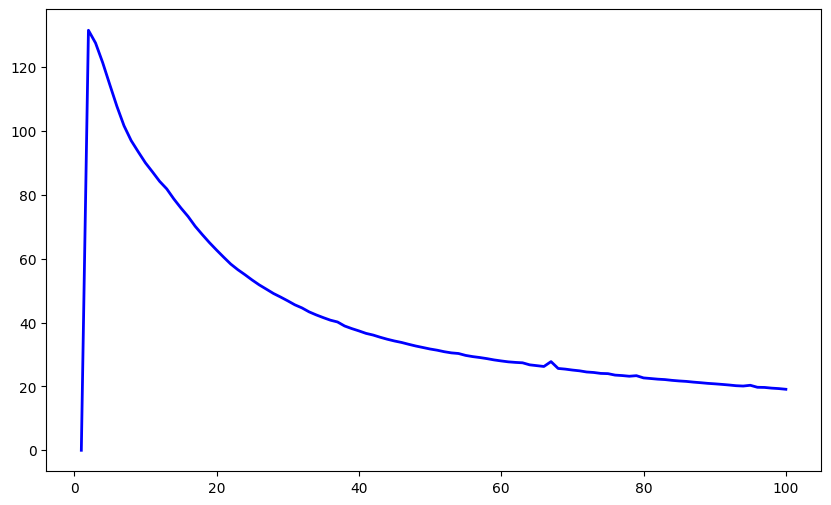

In [11]:
lightning_model = SuperResolutionTrainerModel(input_channels, output_channels, timesteps)
    
checkpoint_callback = pl.callbacks.ModelCheckpoint(
    dirpath="/workspace/eeg-image-decoding/code/models/check_points/super_resolution",
    filename=f"subj{subject}_session{session}_{{epoch}}",
    every_n_epochs=5,
    save_top_k=-1
)

results_callback = SuperResolutionPlottingCallback()

logger = pl.loggers.WandbLogger(project="eeg_super_resolution")

trainer = pl.Trainer(
    max_epochs=epochs,
    callbacks=[checkpoint_callback, results_callback],
    logger=logger,
    accelerator='gpu' if torch.cuda.is_available() else 'cpu',
    devices=1
)

trainer.fit(lightning_model, dm)
# trainer.test(lightning_model, dm)

In [13]:
if logger and isinstance(logger, pl.loggers.WandbLogger):
    logger.finalize('success')
    wandb.finish()

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


epoch,▁▁▁▁▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▅▆▇▇▇▇▇▇▇▇▇▇▇▇██
train_batch_loss,█▇█▆▅▄▄▃▃▃▃▃▂▂▂▂▂▃▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,██▆▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_mae,███▇▇▆▅▅▅▅▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇███
val_loss,██▇▆▆▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mae,██▇▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch,99
train_batch_loss,15.35465
train_loss,18.96441
train_mae,0.38566


In [12]:
results = []
for epoch in range(len(results_callback.train_losses)):
    epoch_results = {
        "epoch": epoch + 1,
        "train_loss": results_callback.train_losses[epoch],
        "val_loss": results_callback.val_losses[epoch] if epoch < len(results_callback.val_losses) else 0
    }
    results.append(epoch_results)

if results_callback.test_metrics:
    results.append({"test_metrics": results_callback.test_metrics})

results

[{'epoch': 1, 'train_loss': 0, 'val_loss': 0},
 {'epoch': 2, 'train_loss': 131.57359313964844, 'val_loss': 0},
 {'epoch': 3,
  'train_loss': 127.58289337158203,
  'val_loss': 127.40613555908203},
 {'epoch': 4,
  'train_loss': 121.45082092285156,
  'val_loss': 122.27582550048828},
 {'epoch': 5,
  'train_loss': 114.53933715820312,
  'val_loss': 116.13976287841797},
 {'epoch': 6, 'train_loss': 107.75090026855469, 'val_loss': 109.4769058227539},
 {'epoch': 7, 'train_loss': 101.6536636352539, 'val_loss': 103.26775360107422},
 {'epoch': 8, 'train_loss': 97.02876281738281, 'val_loss': 98.16058349609375},
 {'epoch': 9, 'train_loss': 93.49620819091797, 'val_loss': 94.27053833007812},
 {'epoch': 10, 'train_loss': 90.06828308105469, 'val_loss': 91.2022476196289},
 {'epoch': 11, 'train_loss': 87.20317840576172, 'val_loss': 88.4902114868164},
 {'epoch': 12, 'train_loss': 84.25396728515625, 'val_loss': 85.88421630859375},
 {'epoch': 13, 'train_loss': 81.8930892944336, 'val_loss': 83.2809829711914},
